# Explore runs

Load and explore embeddings from different methods

TODO:
1. test performance

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

plt.style.use("seaborn-v0_8-whitegrid")

import sys
from pathlib import Path

sys.path.append(str(Path().absolute().parent))

import utilities

Training logs

epoch,step,dataset,loss,name
u32,i64,str,f64,str
1,434,"""train_loss""",0.920988,"""global_mean"""
2,869,"""train_loss""",0.903731,"""global_mean"""
1,434,"""val_loss""",0.898834,"""global_mean"""
2,869,"""val_loss""",0.898837,"""global_mean"""
1,434,"""train_loss""",0.936032,"""nn_inner"""
…,…,…,…,…
13,5654,"""val_loss""",0.75777,"""nn_inner"""
1,434,"""train_loss""",0.920736,"""global_mean"""
2,869,"""train_loss""",0.903708,"""global_mean"""


/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_80229/621457871.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


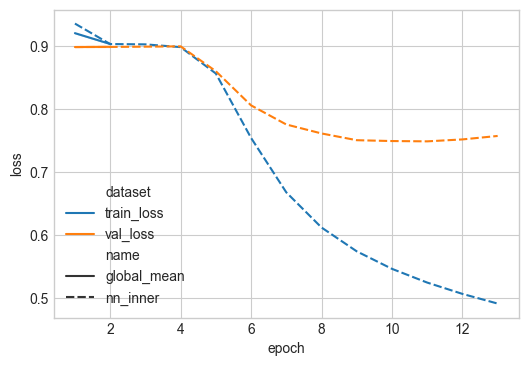

In [2]:
plot_df = utilities.get_training_logs_for_experiment("movie_lens_rating_prediction")
display(plot_df)


fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=plot_df, x="epoch", y="loss", style="name", hue="dataset", ax=ax)
fig.show()